In [1]:
five_percent=[7,8,15,11,9,10]
ten_percent=[12,17,13,18,19,15]
fifteen_percent=[14,18,19,17,16,18]
twenty_percent=[19,25,22,23,18,20]

In [2]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


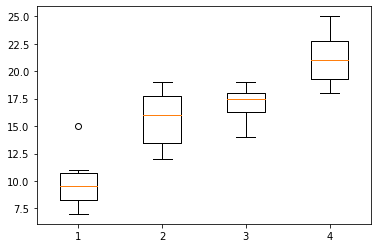

In [3]:
box_plot_data=[five_percent,ten_percent,fifteen_percent,twenty_percent]
plt.boxplot(box_plot_data)
plt.show()

In [4]:
1-scipy.stats.f.cdf(19.6,3,20)


3.599599239012541e-06

In [5]:
scipy.stats.f.ppf(1-0.01,dfn=3,dfd=20)

4.938193382310539

In [6]:
scipy.stats.f_oneway(five_percent,ten_percent,fifteen_percent,twenty_percent)

F_onewayResult(statistic=19.605206999573184, pvalue=3.5925782584743027e-06)

In [7]:
df=pd.read_excel('concentration.xlsx')
df

,concentration5,concentration10,concentration15,concentration20
0,7,12,14,19
1,8,17,18,25
2,15,13,19,22
3,11,18,17,23
4,9,19,16,18
5,10,15,18,20


In [8]:
data_r1=pd.melt(df.reset_index(),id_vars=['index'],value_vars=['concentration5','concentration10','concentration15','concentration20'])
data_r1.columns=['index','treatments','value']

In [9]:
data_r1

,index,treatments,value
0,0,concentration5,7
1,1,concentration5,8
2,2,concentration5,15
3,3,concentration5,11
4,4,concentration5,9
5,5,concentration5,10
6,0,concentration10,12
7,1,concentration10,17
8,2,concentration10,13
9,3,concentration10,18


In [10]:
model=ols('value~C(treatments)',data=data_r1).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.61
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           3.59e-06
Time:                        17:52:33   Log-Likelihood:                -54.344
No. Observations:                  24   AIC:                             116.7
Df Residuals:                      20   BIC:                             121.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           15.6667      1.041     15.042      0.000      13.494      17.839
C(treatments)[T.concentration15]     1.3333      1.473      0.905      0.376      -1.739       4.406
C(treatments)[T.concentration20]     5.5000      1.473      3.734      0.001       2.428       8.572
C(treatments)[T.concentration5]     -5.6667      1.473     -3.847      0.001      -8.739      -2.594
==============================================================================
Omnibus:                        0.929   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.861
Skew:                           0.248   Prob(JB):                        0.650
Kurtosis:                       2.215   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
aov_table=sm.stats.anova_lm(model,typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,382.791667,127.597222,19.605207,0.000004
Residual,20.0,130.166667,6.508333,NaN,NaN
